# Model

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

### Load cleaned training dataset

In [ ]:
df = pd.read_csv('cleaned_data.csv', index_col=0) # load the cleaned data
df.head()

,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel _Business travel,Type of Travel _Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,3,5,3,5,5,4,3,...,0,0,1,1,0,0,1,0,0,1
1,25,235,3,3,1,3,1,1,1,5,...,0,0,1,0,1,1,0,1,0,0
2,26,1142,2,2,5,5,5,5,4,3,...,1,1,0,1,0,1,0,1,0,0
3,25,562,2,5,2,2,2,2,2,5,...,0,1,0,1,0,1,0,1,0,0
4,61,214,3,3,4,5,5,3,3,4,...,1,0,1,1,0,1,0,1,0,0


### Standardization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler() # use min-max standardization for numerical features
df[['Age', 'Flight Distance', 'Departure Delay in Minutes']] = scaler.fit_transform(df[['Age', 'Flight Distance', 'Departure Delay in Minutes']])

In [ ]:
df.head()

,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel _Business travel,Type of Travel _Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,0.076923,0.086632,3,3,5,3,5,5,4,3,...,0,0,1,1,0,0,1,0,0,1
1,0.230769,0.041195,3,3,1,3,1,1,1,5,...,0,0,1,0,1,1,0,1,0,0
2,0.243590,0.224354,2,2,5,5,5,5,4,3,...,1,1,0,1,0,1,0,1,0,0
3,0.230769,0.107229,2,5,2,2,2,2,2,5,...,0,1,0,1,0,1,0,1,0,0
4,0.692308,0.036955,3,3,4,5,5,3,3,4,...,1,0,1,1,0,1,0,1,0,0


In [ ]:
X = df.drop(['satisfaction'], axis=1)
y = df['satisfaction']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

### Fit classification models

We select 11 models for classification, both tree-based models and other types of models

In [ ]:
models = [LogisticRegression(max_iter=100), LinearSVC(), KNeighborsClassifier(), GaussianNB(), SGDClassifier(), DecisionTreeClassifier(),\
       RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), LGBMClassifier(), XGBClassifier()]
model_names = ["Logistic Regression","Linear SVM","KNN","Naive Bayes","SGD",\
            'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'Light GBM', 'XGBoost']

In [ ]:
accuracy_list = []
F1_score=[]
for model in models:
    print(model)
    classifier = model
    classifier.fit(X_train, y_train)
    y_pred=classifier.predict(X_test)
    accuracy_list.append(round(classifier.score(X_test,y_test) * 100, 2))
    F1_score.append(round(f1_score(y_test,y_pred) * 100, 2))

LogisticRegression()


C:\Users\11694\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LinearSVC()


C:\Users\11694\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


KNeighborsClassifier()
GaussianNB()
SGDClassifier()
DecisionTreeClassifier()
RandomForestClassifier()
AdaBoostClassifier()
GradientBoostingClassifier()
LGBMClassifier()
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)


C:\Users\11694\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:07:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
models = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_list,
    'F1 Score': F1_score
})

models.sort_values(by='Accuracy', ascending=False)

models.to_csv('result.csv')

* The detailed model performance table is in the slides. Light GBM is chosen as 
the best model based on both the accuracy and F1 score.  
* Explaination: tree-based models outperform other type of methods. This is probably because they use ensemble learning (bagging/boosting), which make them robust to outliers and can prevent overfitting.  
* Particularly, light GBM is a fast, distributed, high-performance gradient boosting framework that uses a tree-based learning algorithm. It produces much more complex trees by following leaf wise split approach rather than a level-wise approach which is the main factor in achieving higher accuracy.  
(Reference: https://www.kaggle.com/general/264327)

### Tune the hyper-parameters using grid search and cross-validation

In [ ]:
parameters = {
    'max_depth': [4,6,8],
    'num_leaves': [20,30,40],
    'min_child_samples': [18,20,22],
    'min_child_weight':[0.001,0.002]
}

In [ ]:
gsearch = GridSearchCV(LGBMClassifier(), param_grid=parameters, scoring='roc_auc', cv=3)
gsearch.fit(X_train, y_train)
print('best parameters:{0}'.format(gsearch.best_params_))
print('best AUC score:{0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

best parameters:{'max_depth': 8, 'min_child_samples': 18, 'min_child_weight': 0.001, 'num_leaves': 40}
best AUC score:0.9941405279309546
[0.99041735 0.99041735 0.99041735 0.99041735 0.99041735 0.99041735
 0.99054494 0.99054494 0.99054494 0.99054494 0.99054494 0.99054494
 0.99048095 0.99048095 0.99048095 0.99048095 0.99048095 0.99048095
 0.99289672 0.99321338 0.99334351 0.99289672 0.99321338 0.99334351
 0.99297686 0.99328941 0.99331955 0.99297686 0.99328941 0.99331955
 0.99296851 0.99325271 0.99336537 0.99296851 0.99325271 0.99336537
 0.99338938 0.99395878 0.99414053 0.99338938 0.99395878 0.99414053
 0.99336935 0.99391761 0.99406233 0.99336935 0.99391761 0.99406233
 0.99347385 0.99395378 0.99409508 0.99347385 0.99395378 0.99409508]
[{'max_depth': 4, 'min_child_samples': 18, 'min_child_weight': 0.001, 'num_leaves': 20}, {'max_depth': 4, 'min_child_samples': 18, 'min_child_weight': 0.001, 'num_leaves': 30}, {'max_depth': 4, 'min_child_samples': 18, 'min_child_weight': 0.001, 'num_leaves':

The best hyper-parameters are:  
* Maximum tree depth: 8
* Minimum children samples: 18
* Minimum children weight: 0.001
* Number of leaves: 40 

In [ ]:
model = LGBMClassifier(max_depth=8, num_leaves=40, min_child_samples=18, min_child_weight=0.001)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Model performance

#### Feature importance

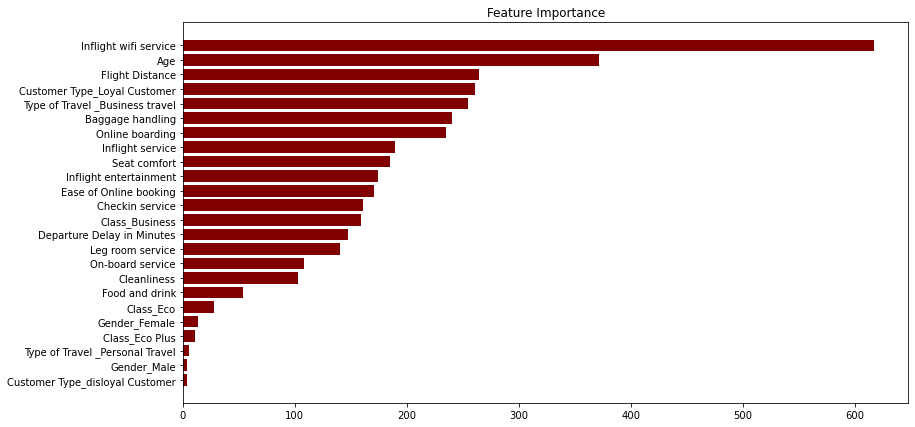

In [ ]:
importances_values = model.feature_importances_
importances = pd.DataFrame(importances_values, columns=['importance'])
feature_data = pd.DataFrame(X_train.columns, columns=['feature'])
importance = pd.concat([feature_data, importances], axis=1)
importance = importance.sort_values(['importance'], ascending=True)
importance.set_index('feature', inplace=True)
importance = importance.reset_index()

plt.figure(figsize=(13, 7))
plt.barh(importance['feature'], importance['importance'], color='maroon')
plt.title('Feature Importance')
plt.show()

The top 10 most important features​ are:
1.   Inflight wifi service​
2.   Age​
3.   Flight Distance​
4.   Customer Type​ - Loyal Customer
5.   Type of Travel​ - Business travel
6.   Baggage handling 
7.   Online boarding
8.   Inflight service
9.   Seat comfort
10.   Inflight entertainment



This indicates how to improve the satisfaction score. Since the features regarding the customers (i.e., age, customer type, type of travel) are something that we cannot change, we mainly focus on the features that are about airline service (i.e., inflight wifi service, online boarding seat comfort).

#### Classification report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11770
           1       0.97      0.94      0.96      9011

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



#### Confusion matrix

Text(0.5, 257.44, 'Predicted label')

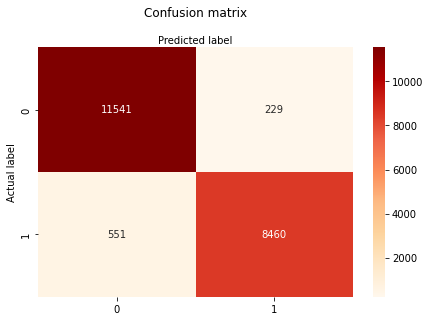

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="OrRd" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9624657138732496
Precision: 0.9736448383013004
Recall: 0.9388525135944956


#### ROC curve

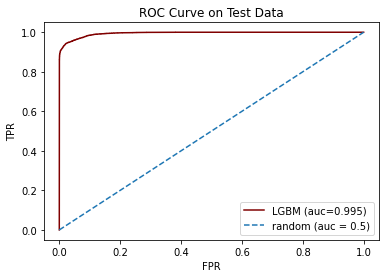

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba),3)
plt.plot(fpr,tpr,label="LGBM (auc="+str(auc)+')', color='maroon')
plt.plot([0, 1], [0, 1], label='random (auc = 0.5)', linestyle='--')
plt.title('ROC Curve on Test Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)
plt.show()

The AUC score is 0.995, very close to 1. This indicates a good fit.

### Feature prediction (Partial Dependence Plot)

Partial Dependent Plot (PDP) is used to quantify how different levels of features can change the predicted satisfaction probability. It shows how the average prediction for satisfaction changes when each feature is changed accordingly.   
(Reference: https://towardsdatascience.com/interpretability-cracking-open-the-black-box-part-ii-e3f932b03a56)

In [ ]:
# Inflight wifi service
levels = range(df['Inflight wifi service'].nunique())
pred_df = pd.DataFrame(index=levels, columns=range(df.shape[0]))
for i in levels:
    tmp = df.copy()
    tmp['Inflight wifi service'] = i
    predictions = model.predict_proba(tmp.drop('satisfaction', axis=1))
    pred_df.iloc[[i],:] = [x[1] for x in predictions]
pdp_values = pred_df.mean(axis=1)[1:]
pdp_values

1    0.375359
2    0.363303
3    0.365105
4    0.532417
5    0.964867
dtype: float64

Text(0, 0.5, 'Satisfaction Probability')

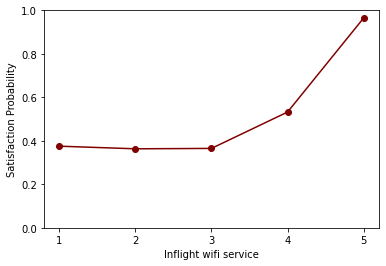

In [ ]:
plt.plot(levels[1:], pdp_values, color="maroon", marker='o')
plt.ylim(0,1)
plt.xticks(levels[1:])
plt.xlabel('Inflight wifi service')
plt.ylabel('Satisfaction Probability')

If inflight wifi service is changed from 1 to 5, then the average predicted satisfaction probability will be changed from 0.37 to 0.96 - a huge increase! This means that if the wifi service is great, it is almost certain that customers will be satisfied.

In [ ]:
# Online boarding
levels = range(df['Online boarding'].nunique())
pred_df = pd.DataFrame(index=levels, columns=range(df.shape[0]))
for i in levels:
    tmp = df.copy()
    tmp['Online boarding'] = i
    predictions = model.predict_proba(tmp.drop('satisfaction', axis=1))
    pred_df.iloc[[i],:] = [x[1] for x in predictions]
pdp_values = pred_df.mean(axis=1)[1:]
pdp_values

1    0.440183
2    0.429031
3    0.416260
4    0.448091
5    0.581970
dtype: float64

Text(0, 0.5, 'Satisfaction Probability')

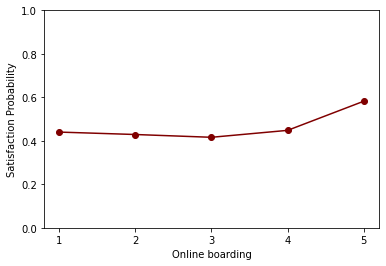

In [ ]:
plt.plot(levels[1:], pdp_values, color="maroon", marker='o')
plt.ylim(0,1)
plt.xticks(levels[1:])
plt.xlabel('Online boarding')
plt.ylabel('Satisfaction Probability')

If online boarding is changed from 0 to 5, then the average predicted satisfaction probability will be changed from 0.44 to 0.58 - a moderate increase.

In [ ]:
# Seat comfort
levels = range(df['Seat comfort'].nunique())
pred_df = pd.DataFrame(index=levels, columns=range(df.shape[0]))
for i in levels:
    tmp = df.copy()
    tmp['Seat comfort'] = i
    predictions = model.predict_proba(tmp.drop('satisfaction', axis=1))
    pred_df.iloc[[i],:] = [x[1] for x in predictions]
pdp_values = pred_df.mean(axis=1)[1:]
pdp_values

1    0.443130
2    0.431962
3    0.424097
4    0.431780
5    0.513689
dtype: float64

Text(0, 0.5, 'Satisfaction Probability')

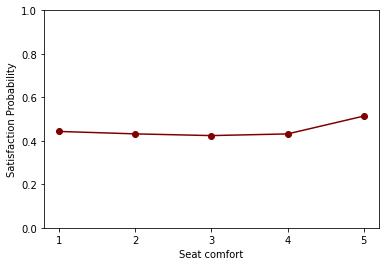

In [ ]:
plt.plot(levels[1:], pdp_values, color="maroon", marker='o')
plt.ylim(0,1)
plt.xticks(levels[1:])
plt.xlabel('Seat comfort')
plt.ylabel('Satisfaction Probability')

If seat comfort is changed from 0 to 5, then the average predicted satisfaction probability will be changed from 0.44 to 0.51 - not much increase.

Inflight wifi service can significantly increase the satisfaction compared with other two features, from the analysis above. More detailed comparion of these 3 features from other aspects is in the slides.